In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the pandas
import pandas as pd
df = pd.read_csv('../data/updated_gender_finding.csv')
df = df.drop_duplicates(subset=['alleg_id'], keep='last')
df

,year,beat_id,alleg_id,officer_gender,officer_race,complainent_gender,complainent_race,final_finding
10,2008,252,1016069,M,Black,M,White,SU
13,2010,174,1042043,F,Hispanic,F,White,SU
15,2010,2,1042143,M,White,M,White,NS
16,2011,228,1048510,M,Native American/Alaskan Native,F,White,SU
19,2015,140,1075972,M,Black,M,White,SU
...,...,...,...,...,...,...,...,...
29502,2008,126,1018181,M,White,F,Black,SU
29503,2009,252,1025935,M,Black,F,White,SU
29505,2010,119,1039190,M,Hispanic,M,White,SU
29507,2016,86,1081104,F,White,M,White,NS


In [ ]:
# Create dummy variables (one shot encoding)
import numpy as np
cols = [
        'beat_id', 'officer_gender', 'officer_race', 'complainent_gender', 
        'complainent_race'
]
df_dummy = df.drop(['alleg_id'], axis=1)
df_dummy = pd.get_dummies(df_dummy, columns=cols)
df_dummy.final_finding = pd.Series(np.where(df_dummy.final_finding.values=='SU', 1, 0), df_dummy.index)
df_dummy

,year,final_finding,beat_id_1,beat_id_2,beat_id_3,beat_id_4,beat_id_5,beat_id_6,beat_id_7,beat_id_8,beat_id_9,beat_id_10,beat_id_11,beat_id_12,beat_id_13,beat_id_14,beat_id_15,beat_id_16,beat_id_17,beat_id_18,beat_id_19,beat_id_20,beat_id_21,beat_id_22,beat_id_23,beat_id_24,beat_id_25,beat_id_26,beat_id_27,beat_id_28,beat_id_29,beat_id_30,beat_id_31,beat_id_32,beat_id_33,beat_id_34,beat_id_35,beat_id_36,beat_id_37,beat_id_38,beat_id_39,beat_id_40,beat_id_41,beat_id_42,beat_id_43,beat_id_44,beat_id_45,beat_id_46,beat_id_47,beat_id_48,beat_id_49,beat_id_51,beat_id_52,beat_id_53,beat_id_54,beat_id_55,beat_id_56,beat_id_57,beat_id_58,beat_id_59,beat_id_60,beat_id_61,beat_id_62,beat_id_63,beat_id_64,beat_id_65,beat_id_66,beat_id_67,beat_id_68,beat_id_69,beat_id_70,beat_id_71,beat_id_72,beat_id_73,beat_id_74,beat_id_75,beat_id_76,beat_id_77,beat_id_78,beat_id_79,beat_id_80,beat_id_81,beat_id_82,beat_id_83,beat_id_84,beat_id_85,beat_id_86,beat_id_87,beat_id_88,beat_id_89,beat_id_90,beat_id_91,beat_id_92,beat_id_93,beat_id_94,beat_id_95,beat_id_96,beat_id_97,beat_id_98,beat_id_99,beat_id_100,beat_id_101,beat_id_102,beat_id_103,beat_id_104,beat_id_105,beat_id_106,beat_id_107,beat_id_108,beat_id_109,beat_id_110,beat_id_111,beat_id_112,beat_id_113,beat_id_114,beat_id_115,beat_id_116,beat_id_117,beat_id_118,beat_id_119,beat_id_120,beat_id_121,beat_id_122,beat_id_123,beat_id_124,beat_id_125,beat_id_126,beat_id_127,beat_id_128,beat_id_129,beat_id_130,beat_id_131,beat_id_132,beat_id_133,beat_id_134,beat_id_135,beat_id_136,beat_id_137,beat_id_138,beat_id_139,beat_id_140,beat_id_141,beat_id_142,beat_id_143,beat_id_144,beat_id_145,beat_id_146,beat_id_147,beat_id_148,beat_id_149,beat_id_150,beat_id_151,beat_id_152,beat_id_153,beat_id_154,beat_id_155,beat_id_156,beat_id_157,beat_id_158,beat_id_159,beat_id_160,beat_id_161,beat_id_162,beat_id_163,beat_id_164,beat_id_165,beat_id_166,beat_id_167,beat_id_168,beat_id_169,beat_id_170,beat_id_171,beat_id_172,beat_id_173,beat_id_174,beat_id_175,beat_id_176,beat_id_177,beat_id_178,beat_id_179,beat_id_180,beat_id_181,beat_id_182,beat_id_183,beat_id_184,beat_id_185,beat_id_186,beat_id_187,beat_id_188,beat_id_189,beat_id_190,beat_id_191,beat_id_192,beat_id_193,beat_id_194,beat_id_195,beat_id_196,beat_id_197,beat_id_198,beat_id_199,beat_id_200,beat_id_201,beat_id_202,beat_id_203,beat_id_204,beat_id_205,beat_id_206,beat_id_207,beat_id_208,beat_id_209,beat_id_210,beat_id_211,beat_id_212,beat_id_213,beat_id_214,beat_id_215,beat_id_216,beat_id_217,beat_id_218,beat_id_219,beat_id_220,beat_id_221,beat_id_222,beat_id_223,beat_id_224,beat_id_225,beat_id_226,beat_id_227,beat_id_228,beat_id_229,beat_id_230,beat_id_231,beat_id_232,beat_id_233,beat_id_234,beat_id_235,beat_id_236,beat_id_237,beat_id_238,beat_id_239,beat_id_240,beat_id_241,beat_id_242,beat_id_243,beat_id_244,beat_id_245,beat_id_246,beat_id_247,beat_id_248,beat_id_249,beat_id_250,beat_id_251,beat_id_252,beat_id_253,beat_id_254,beat_id_255,beat_id_256,beat_id_257,beat_id_258,beat_id_260,beat_id_261,beat_id_262,beat_id_263,beat_id_264,beat_id_265,beat_id_266,beat_id_267,beat_id_268,beat_id_269,beat_id_270,beat_id_271,beat_id_272,beat_id_273,beat_id_274,beat_id_275,beat_id_276,beat_id_277,officer_gender_F,officer_gender_M,officer_race_Asian/Pacific,officer_race_Black,officer_race_Hispanic,officer_race_Native American/Alaskan Native,officer_race_Unknown,officer_race_White,complainent_gender_F,complainent_gender_M,complainent_race_Asian/Pacific Islander,complainent_race_Black,complainent_race_Hispanic,complainent_race_Native American/Alaskan Native,complainent_race_White
10,2008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
# divide full data set into two for down sampling
df_dummy_su = df_dummy.loc[df_dummy['final_finding'] == 1]
df_dummy_ns = df_dummy.loc[df_dummy['final_finding'] == 0]
[df_dummy_su.shape[0], df_dummy_ns.shape[0]]

[2811, 6362]

In [ ]:
# down sample ns
df_dummy_ns = df_dummy_ns.sample(n=len(df_dummy_su), random_state=1)
df_dummy_ns.shape[0]

2811

In [ ]:
# concatenate the two frames together
frames = [df_dummy_ns, df_dummy_su]
df_union = pd.concat(frames)
df_union.shape

(5622, 292)

In [ ]:
df_union

,year,final_finding,beat_id_1,beat_id_2,beat_id_3,beat_id_4,beat_id_5,beat_id_6,beat_id_7,beat_id_8,beat_id_9,beat_id_10,beat_id_11,beat_id_12,beat_id_13,beat_id_14,beat_id_15,beat_id_16,beat_id_17,beat_id_18,beat_id_19,beat_id_20,beat_id_21,beat_id_22,beat_id_23,beat_id_24,beat_id_25,beat_id_26,beat_id_27,beat_id_28,beat_id_29,beat_id_30,beat_id_31,beat_id_32,beat_id_33,beat_id_34,beat_id_35,beat_id_36,beat_id_37,beat_id_38,beat_id_39,beat_id_40,beat_id_41,beat_id_42,beat_id_43,beat_id_44,beat_id_45,beat_id_46,beat_id_47,beat_id_48,beat_id_49,beat_id_51,beat_id_52,beat_id_53,beat_id_54,beat_id_55,beat_id_56,beat_id_57,beat_id_58,beat_id_59,beat_id_60,beat_id_61,beat_id_62,beat_id_63,beat_id_64,beat_id_65,beat_id_66,beat_id_67,beat_id_68,beat_id_69,beat_id_70,beat_id_71,beat_id_72,beat_id_73,beat_id_74,beat_id_75,beat_id_76,beat_id_77,beat_id_78,beat_id_79,beat_id_80,beat_id_81,beat_id_82,beat_id_83,beat_id_84,beat_id_85,beat_id_86,beat_id_87,beat_id_88,beat_id_89,beat_id_90,beat_id_91,beat_id_92,beat_id_93,beat_id_94,beat_id_95,beat_id_96,beat_id_97,beat_id_98,beat_id_99,beat_id_100,beat_id_101,beat_id_102,beat_id_103,beat_id_104,beat_id_105,beat_id_106,beat_id_107,beat_id_108,beat_id_109,beat_id_110,beat_id_111,beat_id_112,beat_id_113,beat_id_114,beat_id_115,beat_id_116,beat_id_117,beat_id_118,beat_id_119,beat_id_120,beat_id_121,beat_id_122,beat_id_123,beat_id_124,beat_id_125,beat_id_126,beat_id_127,beat_id_128,beat_id_129,beat_id_130,beat_id_131,beat_id_132,beat_id_133,beat_id_134,beat_id_135,beat_id_136,beat_id_137,beat_id_138,beat_id_139,beat_id_140,beat_id_141,beat_id_142,beat_id_143,beat_id_144,beat_id_145,beat_id_146,beat_id_147,beat_id_148,beat_id_149,beat_id_150,beat_id_151,beat_id_152,beat_id_153,beat_id_154,beat_id_155,beat_id_156,beat_id_157,beat_id_158,beat_id_159,beat_id_160,beat_id_161,beat_id_162,beat_id_163,beat_id_164,beat_id_165,beat_id_166,beat_id_167,beat_id_168,beat_id_169,beat_id_170,beat_id_171,beat_id_172,beat_id_173,beat_id_174,beat_id_175,beat_id_176,beat_id_177,beat_id_178,beat_id_179,beat_id_180,beat_id_181,beat_id_182,beat_id_183,beat_id_184,beat_id_185,beat_id_186,beat_id_187,beat_id_188,beat_id_189,beat_id_190,beat_id_191,beat_id_192,beat_id_193,beat_id_194,beat_id_195,beat_id_196,beat_id_197,beat_id_198,beat_id_199,beat_id_200,beat_id_201,beat_id_202,beat_id_203,beat_id_204,beat_id_205,beat_id_206,beat_id_207,beat_id_208,beat_id_209,beat_id_210,beat_id_211,beat_id_212,beat_id_213,beat_id_214,beat_id_215,beat_id_216,beat_id_217,beat_id_218,beat_id_219,beat_id_220,beat_id_221,beat_id_222,beat_id_223,beat_id_224,beat_id_225,beat_id_226,beat_id_227,beat_id_228,beat_id_229,beat_id_230,beat_id_231,beat_id_232,beat_id_233,beat_id_234,beat_id_235,beat_id_236,beat_id_237,beat_id_238,beat_id_239,beat_id_240,beat_id_241,beat_id_242,beat_id_243,beat_id_244,beat_id_245,beat_id_246,beat_id_247,beat_id_248,beat_id_249,beat_id_250,beat_id_251,beat_id_252,beat_id_253,beat_id_254,beat_id_255,beat_id_256,beat_id_257,beat_id_258,beat_id_260,beat_id_261,beat_id_262,beat_id_263,beat_id_264,beat_id_265,beat_id_266,beat_id_267,beat_id_268,beat_id_269,beat_id_270,beat_id_271,beat_id_272,beat_id_273,beat_id_274,beat_id_275,beat_id_276,beat_id_277,officer_gender_F,officer_gender_M,officer_race_Asian/Pacific,officer_race_Black,officer_race_Hispanic,officer_race_Native American/Alaskan Native,officer_race_Unknown,officer_race_White,complainent_gender_F,complainent_gender_M,complainent_race_Asian/Pacific Islander,complainent_race_Black,complainent_race_Hispanic,complainent_race_Native American/Alaskan Native,complainent_race_White
26483,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
# create data
X = df_union.loc[:, df_union.columns != 'final_finding']
y = df_union.loc[:, df_union.columns == 'final_finding']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

log_model = LogisticRegression(max_iter=500)
X_train, X_test, y_train, y_test = train_test_split(X, y['final_finding'], test_size=0.20, random_state=1)
log_model.fit(X_train, y_train)
predictions = pd.DataFrame(log_model.predict(X_test))
# predictions = log_model.predict(X_test)

In [ ]:

params = np.append(log_model.intercept_,log_model.coef_)
newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

# s1 = np.dot(newX.T,newX)
# print(s1)
# s2 = np.linalg.inv(s1)
# s3 = s2.diagonal()
# s4 = MSE*s3

var_b = MSE*(np.linalg.pinv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

from scipy import stats
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

idx = df_union.columns.values
idx[0] = 'Intercept'
regression_results = pd.DataFrame(index=idx)
regression_results["Coefficients"],regression_results["Standard Errors"],regression_results["t values"],regression_results["p values"], = [params,sd_b,ts_b,p_values]
pd.set_option('display.max_columns', None)
print(regression_results)


                                                 Coefficients  \
Intercept                                             -0.0383   
final_finding                                          0.0001   
beat_id_1                                             -0.0554   
beat_id_2                                              1.4044   
beat_id_3                                              0.1032   
...                                                       ...   
complainent_race_Asian/Pacific Islander                0.4688   
complainent_race_Black                                -1.2430   
complainent_race_Hispanic                             -0.1081   
complainent_race_Native American/Alaskan Native       -0.0388   
complainent_race_White                                 0.8834   

                                                 Standard Errors  t values  \
Intercept                                                559.543    -0.000   
final_finding                                              0.65

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


In [ ]:
# index to find more relationships
[idx[-14],params[-14]]

['officer_gender_M', -0.1626]

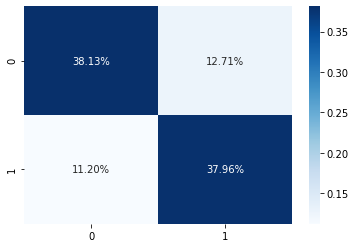

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(predictions, y_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
                    fmt='.2%', cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report
classes = ['Not Sustained', 'Sustained']
print(classification_report(y_test, predictions, target_names=classes))

               precision    recall  f1-score   support

Not Sustained       0.75      0.77      0.76       555
    Sustained       0.77      0.75      0.76       570

     accuracy                           0.76      1125
    macro avg       0.76      0.76      0.76      1125
 weighted avg       0.76      0.76      0.76      1125



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time

names = [
    "Nearest Neighbors",   
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes", 
    "QDA"
]

classifiers = [
    KNeighborsClassifier(4), 
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

scores = []
for name, clf in zip(names, classifiers):
    start = time.time()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = round(clf.score(X_test, y_test), 2)
    scores.append(score)

#calculate accuracy
    from sklearn.metrics import classification_report
    print(name)
    print('-' * 15)
    print(classification_report(y_test, pred))
    print(f'Score: {score}')
    end = time.time()
    elapsed = round(end - start, 2)
    print(f'Elapsed time: {elapsed}s')
    print('_' * 75)

Nearest Neighbors
---------------
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       555
           1       0.76      0.62      0.68       570

    accuracy                           0.70      1125
   macro avg       0.71      0.71      0.70      1125
weighted avg       0.71      0.70      0.70      1125

Score: 0.7
Elapsed time: 2.39s
___________________________________________________________________________
Decision Tree
---------------
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       555
           1       0.70      0.69      0.70       570

    accuracy                           0.70      1125
   macro avg       0.70      0.70      0.70      1125
weighted avg       0.70      0.70      0.70      1125

Score: 0.7
Elapsed time: 0.17s
___________________________________________________________________________
Random Forest
---------------
              precision    recall  f1-

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


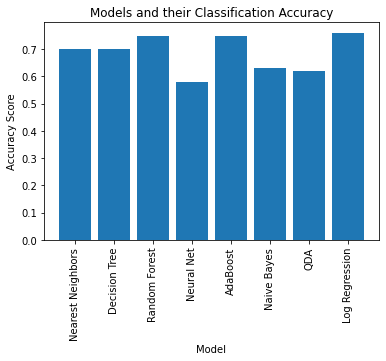

In [ ]:
import matplotlib.pyplot as plt
scores.append(round(log_model.score(X_test, y_test), 2))
names.append("Log Regression")
ax = plt.figure().gca()
plt.title("Models and their Classification Accuracy")
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
ax.bar(names, scores)
plt.xticks(rotation=90)
plt.show()
plt.close()